In [1]:
import numpy as np
import matplotlib as plt
plt.rcParams.update({
    "text.usetex": True
})
import matplotlib.pyplot as plt
from matplotlib import cm

# 1. Rosenbrock's function

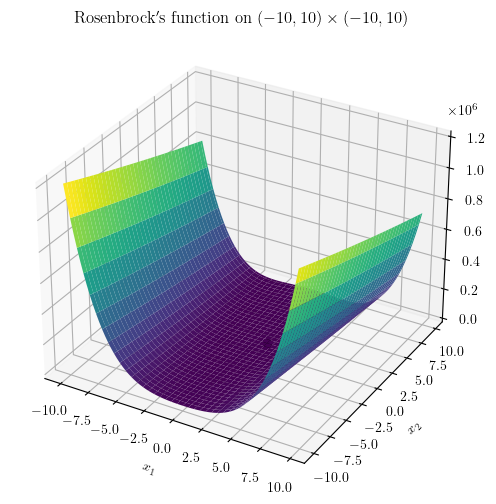

In [2]:
X = np.arange(-10, 10, 0.25) 
Y = np.arange(-10, 10, 0.25)
X, Y = np.meshgrid(X, Y)
Z = (1-X)**2 + 100*(Y-X**2)**2 

fig = plt.figure(figsize=(10,6))
ax = plt.axes(projection='3d')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.text2D(0.95, 0.82, '$\\times 10^{6}$', transform=ax.transAxes) 
plt.ticklabel_format(style='scientific', axis='z', scilimits=(0,1))
ax.plot_surface(X, Y, Z, cmap='viridis') #cm.gist_heat_r
plt.plot(1,1, marker="o", color="black")
ax.set_title('$\mathrm{Rosenbrock\'s\ function\ on\ }(-10,10)\\times(-10,10)$') 
plt.show()

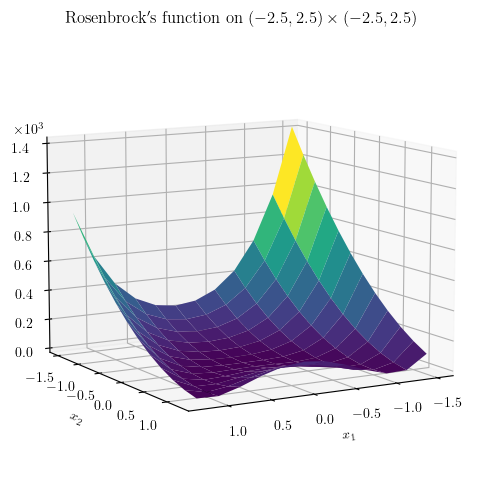

In [3]:
X = np.arange(-1.5, 1.5, 0.25) 
Y = np.arange(-1.5, 1.5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = (1-X)**2 + 100*(Y-X**2)**2 

fig = plt.figure(figsize=(10,6))
ax = plt.axes(projection='3d')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.text2D(0.01, 0.78, '$\\times 10^{3}$', transform=ax.transAxes) 
plt.ticklabel_format(style='scientific', axis='z', scilimits=(0,1))
ax.plot_surface(X, Y, Z, cmap='viridis') #cm.gist_heat_r
plt.plot(1,1, marker="o", color="black")
ax.set_title('$\mathrm{Rosenbrock\'s\ function\ on\ }(-2.5,2.5)\\times(-2.5,2.5)$') 
ax.view_init(10, 60)
plt.show()

Contour of Rosenbrock's function

In [4]:
#plt.contour(X, Y, Z, 100, cmap='viridis')
#plt.plot(1,1, marker="o", color="black")
#plt.text(-1.6, 1.6, '$\mathrm{Contour\ of\ Rosenbrock\'s\ function\ on\ }(-1.5,1.5)\\times(-1.5,1.5)$', fontsize = 12)
# #plt.clabel(contours, inline=True, fontsize=8)
#cbar = plt.colorbar()
#cbar.formatter.set_powerlimits((0, 0))

Contourf of Rosenbrock's function

In [5]:
#plt.contourf(X, Y, Z, 20, cmap='viridis')
#plt.colorbar()

## 1.1 Constant stepsizes

### 1.1.1 Starting point $x^0$

In [6]:
x_0 = np.array([0, 0]) # starting point
n_iterations = 18000 # number of iterations
k = 0 
stepsizes = np.array([0.00206, 0.00202, 0.002002, 0.001]) # several stepsizes to study

K = np.ones((n_iterations,np.shape(stepsizes)[0])) # iterations k
XX = np.ones((n_iterations,np.shape(stepsizes)[0])) # values of x^k_1
YY = np.ones((n_iterations,np.shape(stepsizes)[0])) # values of x^k_2
F = np.ones((n_iterations,np.shape(stepsizes)[0])) # values of f(x^k)
N = np.ones((n_iterations,np.shape(stepsizes)[0])) # values of ||gradient f(x^k)||

Steepest descent algorithm for each stepsize :

In [7]:
for s in stepsizes :
    x = x_0
    for k in range(n_iterations) :
        K[k,np.where(stepsizes == s)[0][0]] = k
        XX[k,np.where(stepsizes == s)[0][0]] = x[0]
        YY[k,np.where(stepsizes == s)[0][0]] = x[1]
        F[k,np.where(stepsizes == s)[0][0]] = np.square(1-x[0]) + 100*np.square(x[1]-x[0]**2)
        grad_k = np.array([400*x[0]*(x[0]**2-x[1])+2*(x[0]-1), 200*(x[1]-x[0]**2)])
        N[k,np.where(stepsizes == s)[0][0]] = np.linalg.norm(grad_k)
        x = x - s*grad_k # steepest descent algorithm

<function matplotlib.pyplot.show(close=None, block=None)>

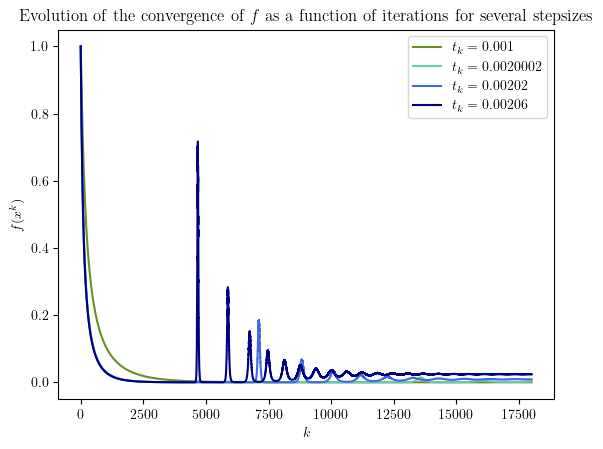

In [8]:
fig = plt.figure()
plt.plot(K[:,3],F[:,3],label='$t_k=0.001$', color='olivedrab')
plt.plot(K[:,2],F[:,2],label='$t_k=0.0020002$', color='mediumaquamarine') 
plt.plot(K[:,1],F[:,1],label='$t_k=0.00202$', color='royalblue')
plt.plot(K[:,0],F[:,0],label='$t_k=0.00206$', color='navy')
plt.xlabel('$k$')
plt.ylabel('$f(x^k)$')
plt.title('$\mathrm{Evolution\ of\ the\ convergence\ of\ } f \mathrm{\ as\ a\ function\ of\ iterations\ for\ several\ stepsizes}$')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

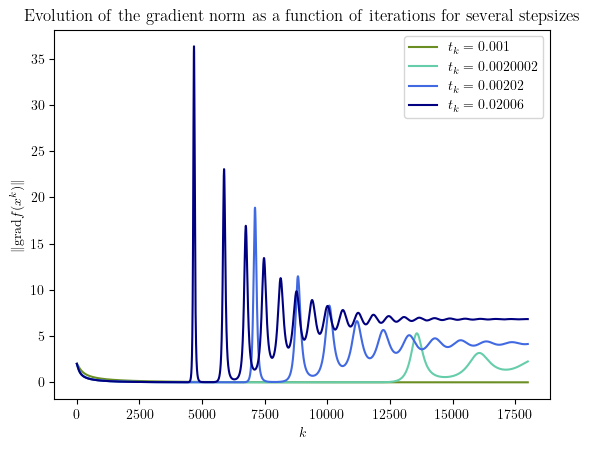

In [9]:
fig = plt.figure()
plt.plot(K[:,3],N[:,3],label='$t_k=0.001$', color='olivedrab')
plt.plot(K[:,2],N[:,2],label='$t_k=0.0020002$', color='mediumaquamarine')
plt.plot(K[:,1],N[:,1],label='$t_k=0.00202$', color='royalblue')
plt.plot(K[:,0],N[:,0],label='$t_k=0.02006$', color='navy')
plt.xlabel('$k$')
plt.ylabel('$\|\mathrm{grad} f(x^k)\|$')
plt.title('$\mathrm{Evolution\ of\ the\ gradient\ norm\ as\ a\ function\ of\ iterations\ for\ several\ stepsizes}$')
plt.legend()
plt.show

For $t_k=0.002$ :

<function matplotlib.pyplot.show(close=None, block=None)>

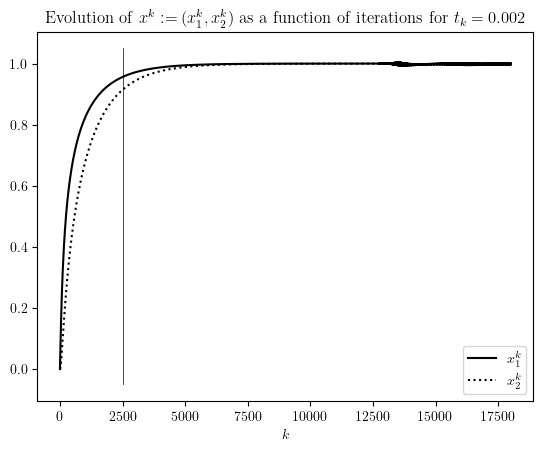

In [10]:
fig = plt.figure()
plt.plot(K[:,2],XX[:,2],label='$x^k_1$', color='black')
plt.plot(K[:,2],YY[:,2],label='$x^k_2$',linestyle='dotted', color='black')
plt.plot([2500, 2500], [-0.05, 1.05], color = 'black', linewidth=0.5)
plt.xlabel('$k$')
plt.title('$\mathrm{Evolution\ of\ }x^k:=(x^k_1,x^k_2) \mathrm{\ as\ a\ function\ of\ iterations\ for\ }t_k=0.002$')
plt.legend()
plt.show

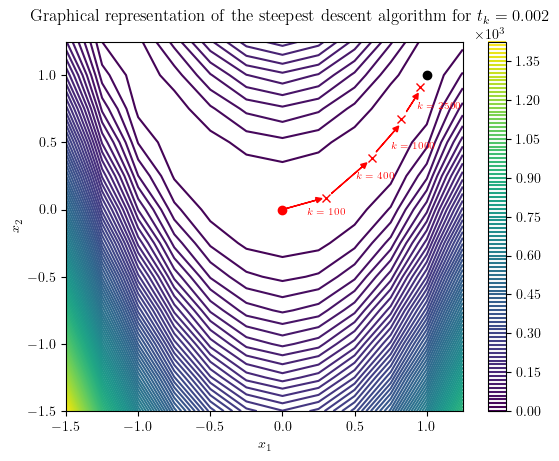

In [11]:
plt.contour(X, Y, Z, 100, cmap='viridis')
plt.plot(1,1, marker="o", color="black")
plt.plot(0,0, marker="o", color="red")

plt.plot(XX[100,2],YY[100,2], marker="x", color="red")
plt.text(0.17, -0.04, '$k=100$', color='red', fontsize=7)
plt.arrow(0, 0, 0.235, 0.07, color='red', head_width=0.04, head_length=0.04, fc='r', ec='r')

plt.plot(XX[400,2],YY[400,2], marker="x", color="red")
plt.text(0.51, 0.23, '$k=400$', color='red', fontsize=7)
plt.arrow(0.34, 0.12, 0.215, 0.2, color='red', head_width=0.04, head_length=0.04, fc='r', ec='r')

plt.plot(XX[1000,2],YY[1000,2], marker="x", color="red")
plt.text(0.75, 0.45, '$k=1000$', color='red', fontsize=7)
plt.arrow(0.65, 0.43, 0.13, 0.16, color='red', head_width=0.04, head_length=0.04, fc='r', ec='r')

plt.plot(XX[2500,2],YY[2500,2], marker="x", color="red")
plt.text(0.93, 0.75, '$k=2500$', color='red', fontsize=7)
plt.arrow(0.86, 0.73, 0.06, 0.1, color='red', head_width=0.04, head_length=0.04, fc='r', ec='r')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.text(-1.75, 1.4, '$\mathrm{Graphical\ representation\ of\ the\ steepest\ descent\ algorithm\ for\ }t_k=0.002$', fontsize = 12)

#plt.clabel(contours, inline=True, fontsize=8)
cbar = plt.colorbar()
cbar.formatter.set_powerlimits((0, 0))

### 1.1.2 Starting point $\tilde{x}^0$

In [12]:
x_0_tilde = np.array([np.pi+1, np.pi-1])
k_tilde = 0 
n_iterations_tilde = 80

stepsizes_tilde = np.array([0.00033778944, 0.00033778, 0.000332, 0.0003])

K_tilde = np.ones((n_iterations_tilde,np.shape(stepsizes_tilde)[0]))
F_tilde = np.ones((n_iterations_tilde,np.shape(stepsizes_tilde)[0]))
N_tilde = np.ones((n_iterations_tilde,np.shape(stepsizes_tilde)[0]))
XX_tilde = np.ones((n_iterations_tilde,np.shape(stepsizes_tilde)[0]))
YY_tilde = np.ones((n_iterations_tilde,np.shape(stepsizes_tilde)[0]))

In [13]:
for s_tilde in stepsizes_tilde :
    x_tilde = x_0_tilde
    for k_tilde in range(n_iterations_tilde) :
        K_tilde[k_tilde,np.where(stepsizes_tilde == s_tilde)[0][0]] = k_tilde
        XX_tilde[k_tilde,np.where(stepsizes_tilde == s_tilde)[0][0]] = x_tilde[0]
        YY_tilde[k_tilde,np.where(stepsizes_tilde == s_tilde)[0][0]] = x_tilde[1]
        F_tilde[k_tilde,np.where(stepsizes_tilde == s_tilde)[0][0]] = np.square(1-x_tilde[0]) + 100*np.square(x_tilde[1]-x_tilde[0]**2)
        grad_k_tilde = np.array([400*x_tilde[0]*(x_tilde[0]**2-x_tilde[1])+2*(x_tilde[0]-1), 200*(x_tilde[1]-x_tilde[0]**2)])
        N_tilde[k_tilde,np.where(stepsizes_tilde == s_tilde)[0][0]] = np.linalg.norm(grad_k_tilde)
        x_tilde = x_tilde - s_tilde*grad_k_tilde

<function matplotlib.pyplot.show(close=None, block=None)>

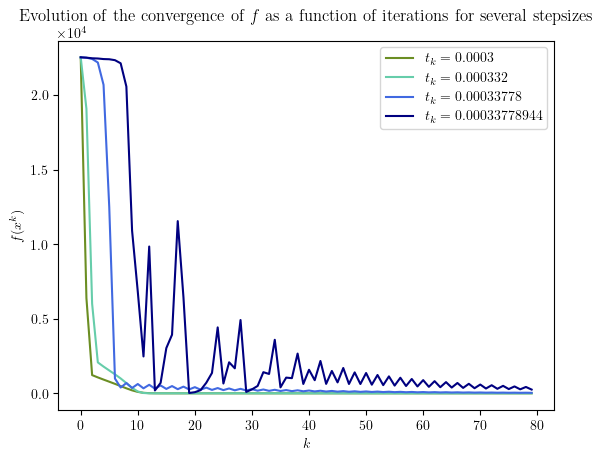

In [14]:
fig_tilde = plt.figure()
plt.plot(K_tilde[:,3],F_tilde[:,3],label='$t_k=0.0003$', color='olivedrab')
plt.plot(K_tilde[:,2],F_tilde[:,2],label='$t_k=0.000332$', color='mediumaquamarine')
plt.plot(K_tilde[:,1],F_tilde[:,1],label='$t_k=0.00033778$', color='royalblue')
plt.plot(K_tilde[:,0],F_tilde[:,0],label='$t_k=0.00033778944$', color='navy')
plt.xlabel('$k$')
plt.ylabel('$f(x^k)$')
plt.ticklabel_format(style='scientific', axis='y', scilimits=(0,1))
plt.title('$\mathrm{Evolution\ of\ the\ convergence\ of\ } f \mathrm{\ as\ a\ function\ of\ iterations\ for\ several\ stepsizes}$',y=1.0, pad=14)
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

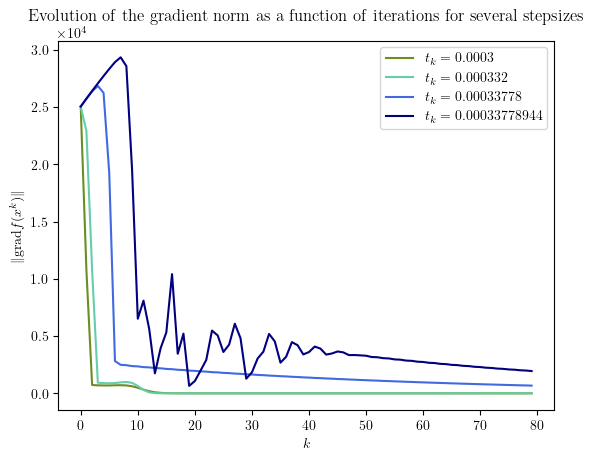

In [15]:
fig = plt.figure()
plt.plot(K_tilde[:,3],N_tilde[:,3],label='$t_k=0.0003$', color='olivedrab')
plt.plot(K_tilde[:,2],N_tilde[:,2],label='$t_k=0.000332$', color='mediumaquamarine')
plt.plot(K_tilde[:,1],N_tilde[:,1],label='$t_k=0.00033778$', color='royalblue')
plt.plot(K_tilde[:,0],N_tilde[:,0],label='$t_k=0.00033778944$', color='navy')
plt.xlabel('$k$')
plt.ylabel('$\|\mathrm{grad}f(x^k)\|$')
plt.ticklabel_format(style='scientific', axis='y', scilimits=(0,1))
plt.title('$\mathrm{Evolution\ of\ the\ gradient\ norm\ as\ a\ function\ of\ iterations\ for\ several\ stepsizes}$',y=1.0, pad=14)
plt.legend()
plt.show

For $t_k=0.000332$ :

<function matplotlib.pyplot.show(close=None, block=None)>

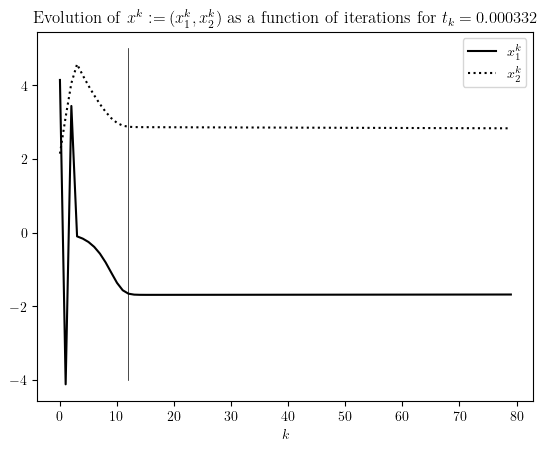

In [16]:
fig = plt.figure()
plt.plot(K_tilde[:,2], XX_tilde[:,2], label='$x^k_1$', color='black')
plt.plot(K_tilde[:,2], YY_tilde[:,2], label='$x^k_2$', linestyle='dotted', color='black')
plt.plot([12, 12], [-4, 5], color = 'black', linewidth=0.5)
plt.xlabel('$k$')
plt.title('$\mathrm{Evolution\ of\ }x^k:=(x^k_1,x^k_2) \mathrm{\ as\ a\ function\ of\ iterations\ for\ }t_k=0.000332$')
plt.legend()
plt.show

In [17]:
XX_tilde[50,2]

-1.6841605632187926

In [18]:
YY_tilde[50,2]

2.843719973434767

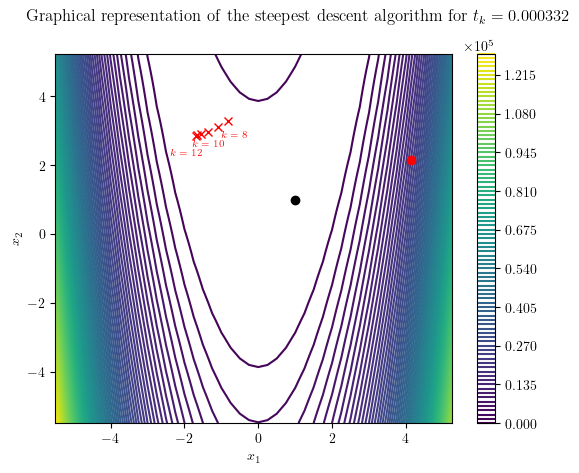

In [19]:
X = np.arange(-5.5, 5.5, 0.25) 
Y = np.arange(-5.5, 5.5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = (1-X)**2 + 100*(Y-X**2)**2 #Z = np.square(1-X) + 100*np.square(Y-X**2)

plt.contour(X, Y, Z, 100, cmap='viridis')
plt.plot(4.14,2.14, marker="o", color="red")
plt.plot(1,1, marker="o", color="black")

plt.plot(XX_tilde[8,2],YY_tilde[8,2], marker="x", color="red")
plt.plot(XX_tilde[9,2],YY_tilde[9,2], marker="x", color="red")
plt.plot(XX_tilde[10,2],YY_tilde[10,2], marker="x", color="red")
plt.plot(XX_tilde[11,2],YY_tilde[11,2], marker="x", color="red")
plt.plot(XX_tilde[12,2],YY_tilde[12,2], marker="x", color="red")
plt.plot(XX_tilde[13,2],YY_tilde[13,2], marker="x", color="red")
plt.text(-1, 2.8, '$k=8$', color='red', fontsize=7)
plt.text(-1.8, 2.55, '$k=10$', color='red', fontsize=7)
plt.text(-2.4, 2.3, '$k=12$', color='red', fontsize=7)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.text(-6.3, 6.2, '$\mathrm{Graphical\ representation\ of\ the\ steepest\ descent\ algorithm\ for\ }t_k=0.000332$', fontsize = 12)
#plt.clabel(contours, inline=True, fontsize=8)
cbar = plt.colorbar()
cbar.formatter.set_powerlimits((0, 0))

In [20]:
F_tilde[0,0]

22543.473305841893

## 1.2 Nonconstant stepsize

$\textbf{Remark 94}$ The Armijo-stepsize is not uniquely determined and can be computed with the Goldstein-Armijo algorithm 
- $(S.0)$ Let $\delta \in ]0,1[$, $\sigma >0$, $0<\beta_1 \leqslant \beta_2 <1$
- $(S.1)$ Take $\tau_0 \geqslant - \sigma \frac{\nabla f(x)^\top d}{\| d\|^2}=- \sigma \frac{\nabla f(x)^\top \big(-\nabla f(x)\big)}{\| -\nabla f(x)\|^2}=-\sigma \frac{-\| \nabla f(x)\|^2}{\|\nabla f(x)\|^2}=\sigma$ and $j=0$
- $(S.2)$ If $f(x+\tau_j d)\leqslant f(x)+\delta \tau_j \nabla f(x)^\top d=f(x)-\delta \tau_j \| \nabla f(x)\|^2$, then $t_A=\tau_j$ : STOP.
- $(S.3)$ Else take $\tau_{j+1}\in [\beta_1 \tau_j, \beta_2\tau_j]$, let $j=j+1$, go to $(S.2)$.

Or $ f(x)-\delta \tau_j \| \nabla f(x)\|^2 \leqslant f(x)-\delta(-\sigma)\|\nabla f(x)\|^2=f(x)+\delta\sigma \|f(x)\|^2$.

### 1.2.1 Starting point $x^0$

In [21]:
# (S.0)
delta = 0.01
sigma = 0.5
beta_1 = 0.25
beta_2 = 0.75
# (S.1)
tau = sigma
j = 0

t_A = 0
n_iterations = 5000
x = np.array([0, 0])
K = np.ones(n_iterations) # iterations k
XX = np.ones(n_iterations) # values of x^k_1
YY = np.ones(n_iterations) # values of x^k_2
F = np.ones(n_iterations) # values of f(x^k)
N = np.ones(n_iterations) # values of ||gradient f(x^k)||

for k in range(n_iterations) :
    K[k] = k
    XX[k] = x[0]
    YY[k] = x[1]
    F[k] = np.square(1-x[0]) + 100*np.square(x[1]-x[0]**2)
    grad_k = np.array([400*x[0]*(x[0]**2-x[1])+2*(x[0]-1), 200*(x[1]-x[0]**2)])
    N[k] = np.linalg.norm(grad_k)
    #print(np.square(1-(x[0]-tau*400*x[0]*(x[0]**2-x[1])+2*(x[0]-1))) + 100*np.square(x[1]-tau*200*(x[1]-x[0]**2)-(x[0]-tau*400*x[0]*(x[0]**2-x[1])+2*(x[0]-1))**2))
    #print(np.square(1-x[0]) + 100*np.square(x[1]-x[0]**2) - delta*tau*np.linalg.norm(np.array([400*x[0]*(x[0]**2-x[1])+2*(x[0]-1), 200*(x[1]-x[0]**2)]))**2)
    while np.square(1-(x[0]-tau*(400*x[0]*(x[0]**2-x[1])+2*(x[0]-1)))) + 100*np.square(x[1]-tau*200*(x[1]-x[0]**2)-(x[0]-tau*(400*x[0]*(x[0]**2-x[1])+2*(x[0]-1)))**2) > np.square(1-x[0]) + 100*np.square(x[1]-x[0]**2) - delta*tau*np.square(np.linalg.norm(np.array([400*x[0]*(x[0]**2-x[1])+2*(x[0]-1), 200*(x[1]-x[0]**2)]))):
        tau = (beta_2*tau-beta_1*tau)*np.random.random_sample()+beta_1*tau
        #print(tau)
        j = j+1        
        #print(j)
    t_A = tau
    #print('t_A = ' + str(t_A))
    x = x - t_A*grad_k # steepest descent algorithm

<function matplotlib.pyplot.show(close=None, block=None)>

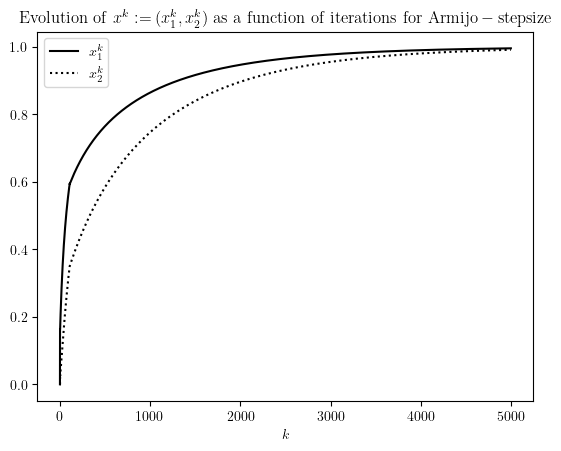

In [22]:
fig = plt.figure()
plt.plot(K, XX, label='$x^k_1$', color='black')
plt.plot(K, YY, label='$x^k_2$', linestyle='dotted', color='black')
plt.xlabel('$k$')
plt.title('$\mathrm{Evolution\ of\ }x^k:=(x^k_1,x^k_2) \mathrm{\ as\ a\ function\ of\ iterations\ for\ Armijo-stepsize}$')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

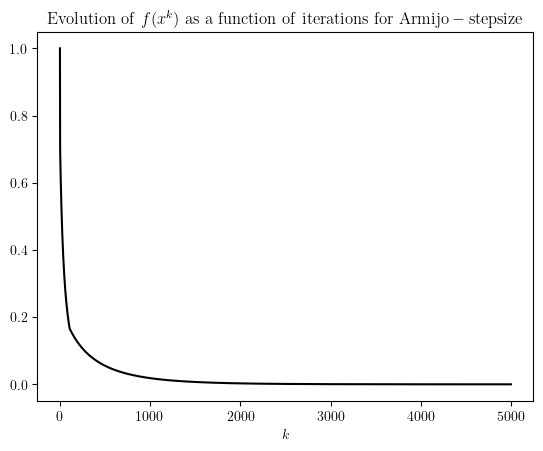

In [23]:
fig = plt.figure()
plt.plot(K, F, color='black')
plt.xlabel('$k$')
plt.title('$\mathrm{Evolution\ of\ }f(x^k) \mathrm{\ as\ a\ function\ of\ iterations\ for\ Armijo-stepsize}$')
#plt.legend()
plt.show

In [24]:
XX[4500]

0.9935351767343301

In [25]:
YY[4500]

0.987086176994173

In [26]:
F[4500]

4.186138609846445e-05

## 1.2.2 Starting point $\tilde{x}^0$

In [27]:
# (S.0)
delta = 0.01
sigma = 0.5
beta_1 = 0.25
beta_2 = 0.75
# (S.1)
tau = sigma
j = 0

t_A = 0
n_iterations = 50000
x = np.array([np.pi+1, np.pi-1])
K = np.ones(n_iterations) # iterations k
XX = np.ones(n_iterations) # values of x^k_1
YY = np.ones(n_iterations) # values of x^k_2
F = np.ones(n_iterations) # values of f(x^k)
N = np.ones(n_iterations) # values of ||gradient f(x^k)||

for k in range(n_iterations) :
    K[k] = k
    XX[k] = x[0]
    YY[k] = x[1]
    F[k] = np.square(1-x[0]) + 100*np.square(x[1]-x[0]**2)
    grad_k = np.array([400*x[0]*(x[0]**2-x[1])+2*(x[0]-1), 200*(x[1]-x[0]**2)])
    N[k] = np.linalg.norm(grad_k)
    #print(np.square(1-(x[0]-tau*400*x[0]*(x[0]**2-x[1])+2*(x[0]-1))) + 100*np.square(x[1]-tau*200*(x[1]-x[0]**2)-(x[0]-tau*400*x[0]*(x[0]**2-x[1])+2*(x[0]-1))**2))
    #print(np.square(1-x[0]) + 100*np.square(x[1]-x[0]**2) - delta*tau*np.linalg.norm(np.array([400*x[0]*(x[0]**2-x[1])+2*(x[0]-1), 200*(x[1]-x[0]**2)]))**2)
    while np.square(1-(x[0]-tau*(400*x[0]*(x[0]**2-x[1])+2*(x[0]-1)))) + 100*np.square(x[1]-tau*200*(x[1]-x[0]**2)-(x[0]-tau*(400*x[0]*(x[0]**2-x[1])+2*(x[0]-1)))**2) > np.square(1-x[0]) + 100*np.square(x[1]-x[0]**2) - delta*tau*np.square(N[k]):
        #print(np.square(1-(x[0]-tau*400*x[0]*(x[0]**2-x[1])+2*(x[0]-1))) + 100*np.square(x[1]-tau*200*(x[1]-x[0]**2)-(x[0]-tau*400*x[0]*(x[0]**2-x[1])+2*(x[0]-1))**2))
        #print(np.square(1-x[0]) + 100*np.square(x[1]-x[0]**2) - delta*tau*np.linalg.norm(np.array([400*x[0]*(x[0]**2-x[1])+2*(x[0]-1), 200*(x[1]-x[0]**2)]))**2)
        tau = (beta_2*tau-beta_1*tau)*np.random.random_sample()+beta_1*tau
        #print(tau)
        j = j+1        
        #print(j)
    t_A = tau
    #print('t_A = ' + str(t_A))
    x = x - t_A*grad_k # steepest descent algorithm

<function matplotlib.pyplot.show(close=None, block=None)>

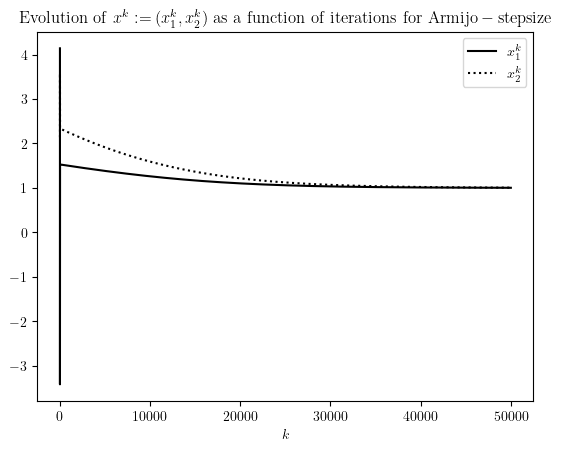

In [28]:
fig = plt.figure()
plt.plot(K, XX, label='$x^k_1$', color='black')
plt.plot(K, YY, label='$x^k_2$', linestyle='dotted', color='black')
plt.xlabel('$k$')
plt.title('$\mathrm{Evolution\ of\ }x^k:=(x^k_1,x^k_2) \mathrm{\ as\ a\ function\ of\ iterations\ for\ Armijo-stepsize}$')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

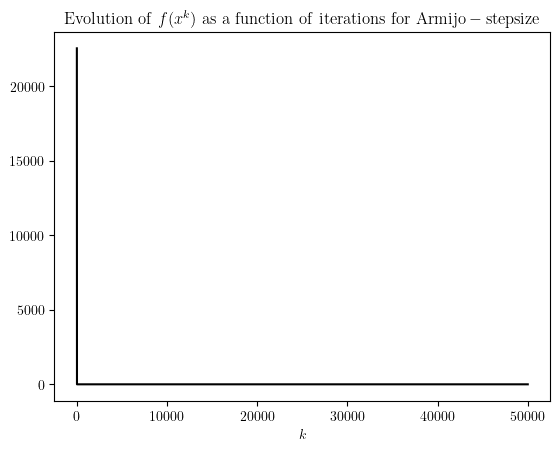

In [29]:
fig = plt.figure()
plt.plot(K, F, color='black')
plt.xlabel('$k$')
plt.title('$\mathrm{Evolution\ of\ }f(x^k) \mathrm{\ as\ a\ function\ of\ iterations\ for\ Armijo-stepsize}$')
#plt.legend()
plt.show

In [30]:
XX[40000]

1.0105004799953041

In [31]:
YY[40000]

1.0211529741373195

In [32]:
F[40000]

0.00011043442033937529

# 2. Easom's function

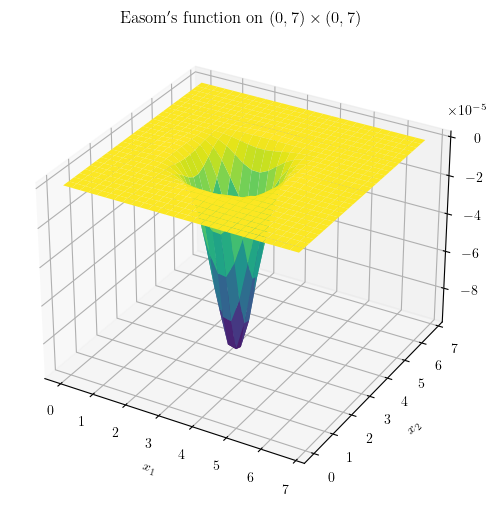

In [33]:
X = np.arange(0, 7, 0.25)
Y = np.arange(0, 7, 0.25)
X, Y = np.meshgrid(X, Y)
Z = -np.cos(X)*np.cos(Y)*np.exp(-(X-np.pi)**2-(Y-np.pi)**2)

fig = plt.figure(figsize=(10,6))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis') #cm.gist_heat_r
#plt.plot(1,1, marker="o", color="black")
ax.set_xlabel('$x_1$', rotation=50)
ax.set_ylabel('$x_2$')
ax.text2D(0.95, 0.82, '$\\times 10^{-5}$', transform=ax.transAxes)
plt.ticklabel_format(style='scientific', axis='z', scilimits=(0,1))
ax.set_title('$\mathrm{Easom\'s\ function\ on\ }(0,7)\\times(0,7)$') 
#ax.view_init(0, 120)
plt.show()

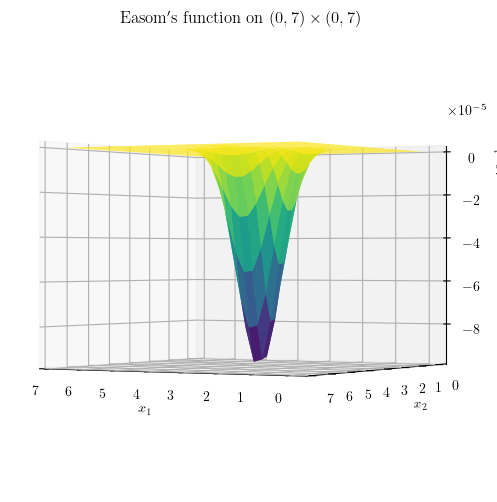

In [34]:
fig = plt.figure(figsize=(10,6))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis') 
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.text2D(0.95, 0.82, '$\\times 10^{-5}$', transform=ax.transAxes)
plt.ticklabel_format(style='scientific', axis='z', scilimits=(0,1))
ax.set_title('$\mathrm{Easom\'s\ function\ on\ }(0,7)\\times(0,7)$') 
ax.view_init(0, 120)
plt.show()

# 2.1 Constant stepsize

### 2.1.1 Starting point $x^0$

In [35]:
x_0 = np.array([0, 0]) 
k = 0 
n_iterations = 10000
stepsizes = np.array([5000, 4500, 4000, 3955, 3954, 2500, 1900, 1600, 1000, 700, 1498, 1497, 1496.5, 1496, 1400])

K = np.ones((n_iterations,np.shape(stepsizes)[0]))
F = np.ones((n_iterations,np.shape(stepsizes)[0]))
N = np.ones((n_iterations,np.shape(stepsizes)[0]))
XX = np.ones((n_iterations,np.shape(stepsizes)[0]))
YY = np.ones((n_iterations,np.shape(stepsizes)[0]))

In [36]:
for s in stepsizes :
    x = x_0
    for k in range(n_iterations) :
        K[k,np.where(stepsizes == s)[0][0]] = k
        F[k,np.where(stepsizes == s)[0][0]] = -np.cos(x[0])*np.cos(x[1])*np.exp(-(x[0]-np.pi)**2 - (x[1]-np.pi)**2) 
        XX[k,np.where(stepsizes == s)[0][0]] = x[0]
        YY[k,np.where(stepsizes == s)[0][0]] = x[1]
        grad_k = np.array([np.cos(x[1])*np.exp(-(x[0]-np.pi)**2 - (x[1]-np.pi)**2)*(np.sin(x[0]) + 2*np.cos(x[0])*(x[0]-np.pi)), np.cos(x[0])*np.exp(-(x[0]-np.pi)**2 - (x[1]-np.pi)**2)*(np.sin(x[1]) + 2*np.cos(x[1])*(x[1]-np.pi))])
        N[k,np.where(stepsizes == s)[0][0]] = np.linalg.norm(grad_k)
        x = x - s*grad_k

<function matplotlib.pyplot.show(close=None, block=None)>

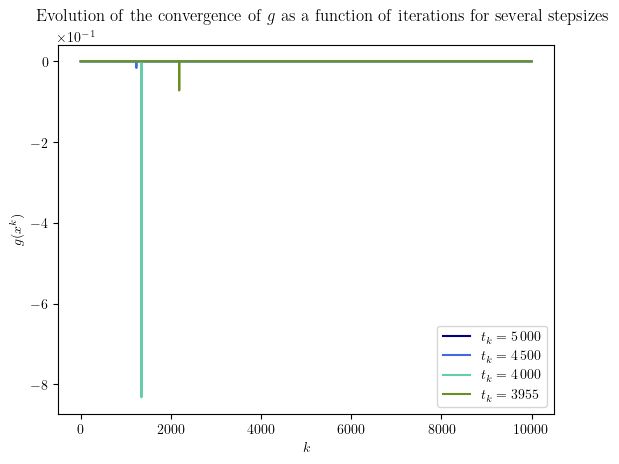

In [37]:
fig = plt.figure()
plt.plot(K[:,0],F[:,0],label='$t_k=5\,000$', color='navy')
plt.plot(K[:,1],F[:,1],label='$t_k=4\,500$', color='royalblue')
plt.plot(K[:,2],F[:,2],label='$t_k=4\,000$', color='mediumaquamarine') 
plt.plot(K[:,3],F[:,3],label='$t_k=3955$', color='olivedrab')
plt.xlabel('$k$')
plt.ylabel('$g(x^k)$')
plt.ticklabel_format(style='scientific', axis='y', scilimits=(0,0))
plt.text(-1000, 0.1, '$\mathrm{Evolution\ of\ the\ convergence\ of\ } g \mathrm{\ as\ a\ function\ of\ iterations\ for\ several\ stepsizes}$', fontsize = 12)
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

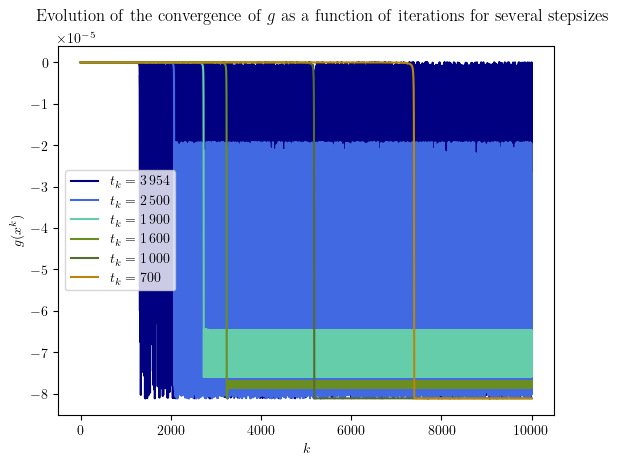

In [38]:
fig = plt.figure()
plt.plot(K[:,4],F[:,4],label='$t_k=3\,954$', color='navy')
plt.plot(K[:,5],F[:,5],label='$t_k=2\,500$', color='royalblue')
plt.plot(K[:,6],F[:,6],label='$t_k=1\,900$', color='mediumaquamarine') 
plt.plot(K[:,7],F[:,7],label='$t_k=1\,600$', color='olivedrab')
plt.plot(K[:,8],F[:,8],label='$t_k=1\,000$', color='darkolivegreen') 
plt.plot(K[:,9],F[:,9],label='$t_k=700$', color='darkgoldenrod')
plt.xlabel('$k$')
plt.ylabel('$g(x^k)$')
plt.ticklabel_format(style='scientific', axis='y', scilimits=(0,0))
plt.text(-1000, 0.00001, '$\mathrm{Evolution\ of\ the\ convergence\ of\ } g \mathrm{\ as\ a\ function\ of\ iterations\ for\ several\ stepsizes}$', fontsize = 12)
plt.legend()
plt.show

In [39]:
-np.cos(1.30499545)*np.cos(1.30499545)*np.exp(-(1.30499545-np.pi)**2 - (1.30499545-np.pi)**2) 

-8.110223891570075e-05

<function matplotlib.pyplot.show(close=None, block=None)>

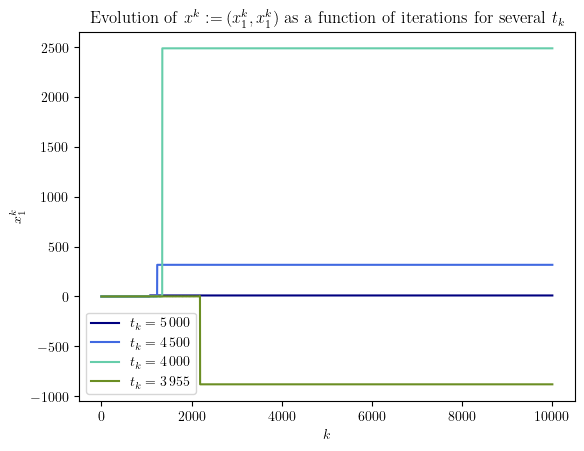

In [40]:
fig = plt.figure()
plt.plot(K[:,0], XX[:,0], label='$t_k=5\,000$', color='navy')
plt.plot(K[:,1], XX[:,1], label='$t_k=4\,500$', color='royalblue')
plt.plot(K[:,2], XX[:,2], label='$t_k=4\,000$', color='mediumaquamarine')
plt.plot(K[:,3], XX[:,3], label='$t_k=3\,955$', color='olivedrab')
plt.xlabel('$k$')
plt.ylabel('$x^k_1$')
plt.title('$\mathrm{Evolution\ of\ }x^k:=(x^k_1,x^k_1) \mathrm{\ as\ a\ function\ of\ iterations\ for\ several\ }t_k$')
plt.legend()
plt.show

For $t_k=1000$ :

Text(-0.77, 5, '$$\\mathrm{Graphical\\ representation\\ of\\ the\\ steepest\\ descent\\ algorithm\\ for\\ }t_k=1\\,000$$')

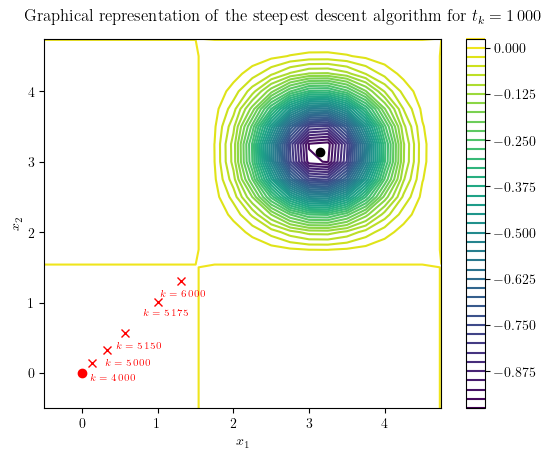

In [41]:
X = np.arange(-0.5, 5, 0.25)
Y = np.arange(-0.5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = -np.cos(X)*np.cos(Y)*np.exp(-(X-np.pi)**2-(Y-np.pi)**2)
plt.contour(X, Y, Z, 40, cmap='viridis')
plt.plot(XX[4000,8],YY[4000,8], marker="x", color="red")
plt.plot(XX[5000,8],YY[5000,8], marker="x", color="red")
plt.plot(XX[5150,8],YY[5150,8], marker="x", color="red")
plt.plot(XX[5175,8],YY[5175,8], marker="x", color="red")
plt.plot(XX[6000,8],YY[6000,8], marker="x", color="red")
plt.text(0.1, -0.1, '$k=4\,000$', color='red', fontsize=7)
plt.text(0.3, 0.1, '$k=5\,000$', color='red', fontsize=7)
plt.text(0.45, 0.35, '$k=5\,150$', color='red', fontsize=7)
plt.text(0.8, 0.82, '$k=5\,175$', color='red', fontsize=7)
plt.text(1.03, 1.08, '$k=6\,000$', color='red', fontsize=7)
plt.xlabel('$x_1$')
plt.ylabel("$x_2$")
plt.plot(0, 0, marker='o', color="red")
cbar = plt.colorbar()
plt.plot(3.1415,3.1415, marker="o", color="black")
plt.text(-0.77, 5, '$$\mathrm{Graphical\ representation\ of\ the\ steepest\ descent\ algorithm\ for\ }t_k=1\,000$$', fontsize = 12)

In [42]:
-np.cos(0)*np.cos(0)*np.exp(-(0-np.pi)**2 - (0-np.pi)**2) 

-2.675287991074243e-09

### 2.1.2 Starting point $\tilde{x}^0$

In [43]:
x_0_tilde = np.array([np.pi+1, np.pi-1])
k_tilde = 0 
n_iterations_tilde = 7000
stepsizes_tilde = np.array([0.6, 0.1, 0.01, 0.005, 0.001, 0.0005])

K_tilde = np.ones((n_iterations_tilde,np.shape(stepsizes_tilde)[0]))
F_tilde = np.ones((n_iterations_tilde,np.shape(stepsizes_tilde)[0]))
N_tilde = np.ones((n_iterations_tilde,np.shape(stepsizes_tilde)[0]))
XX_tilde = np.ones((n_iterations_tilde,np.shape(stepsizes_tilde)[0]))
YY_tilde = np.ones((n_iterations_tilde,np.shape(stepsizes_tilde)[0]))

In [44]:
for s_tilde in stepsizes_tilde :
    x_tilde = x_0_tilde
    for k_tilde in range(n_iterations_tilde) :
        K_tilde[k_tilde,np.where(stepsizes_tilde == s_tilde)[0][0]] = k_tilde
        F_tilde[k_tilde,np.where(stepsizes_tilde == s_tilde)[0][0]] = -np.cos(x_tilde[0])*np.cos(x_tilde[1])*np.exp(-(x_tilde[0]-np.pi)**2 - (x_tilde[1]-np.pi)**2) 
        XX_tilde[k_tilde,np.where(stepsizes_tilde == s_tilde)[0][0]] = x_tilde[0]
        YY_tilde[k_tilde,np.where(stepsizes_tilde == s_tilde)[0][0]] = x_tilde[1]
        grad_k_tilde = np.array([np.cos(x_tilde[1])*np.exp(-(x_tilde[0]-np.pi)**2 - (x_tilde[1]-np.pi)**2)*(np.sin(x_tilde[0]) + 2*np.cos(x_tilde[0])*(x_tilde[0]-np.pi)), np.cos(x_tilde[0])*np.exp(-(x_tilde[0]-np.pi)**2 - (x_tilde[1]-np.pi)**2)*(np.sin(x_tilde[1]) + 2*np.cos(x_tilde[1])*(x_tilde[1]-np.pi))])
        N_tilde[k_tilde,np.where(stepsizes_tilde == s_tilde)[0][0]] = np.linalg.norm(grad_k_tilde)
        x_tilde = x_tilde - s_tilde*grad_k_tilde

<function matplotlib.pyplot.show(close=None, block=None)>

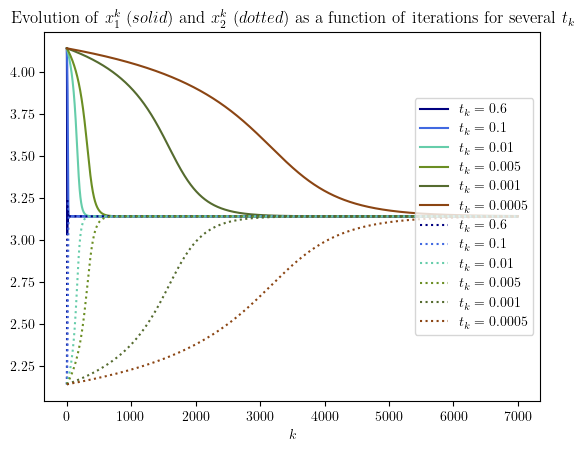

In [45]:
fig = plt.figure()
plt.plot(K_tilde[:,0], XX_tilde[:,0], label='$t_k=0.6$', color='navy')
plt.plot(K_tilde[:,1], XX_tilde[:,1], label='$t_k=0.1$', color='royalblue')
plt.plot(K_tilde[:,2], XX_tilde[:,2], label='$t_k=0.01$', color='mediumaquamarine')
plt.plot(K_tilde[:,3], XX_tilde[:,3], label='$t_k=0.005$', color='olivedrab')
plt.plot(K_tilde[:,4], XX_tilde[:,4], label='$t_k=0.001$', color='darkolivegreen')
plt.plot(K_tilde[:,5], XX_tilde[:,5], label='$t_k=0.0005$', color='saddlebrown')
plt.plot(K_tilde[:,0], YY_tilde[:,0], label='$t_k=0.6$', color='navy', linestyle='dotted')
plt.plot(K_tilde[:,1], YY_tilde[:,1], label='$t_k=0.1$', color='royalblue', linestyle='dotted')
plt.plot(K_tilde[:,2], YY_tilde[:,2], label='$t_k=0.01$', color='mediumaquamarine', linestyle='dotted')
plt.plot(K_tilde[:,3], YY_tilde[:,3], label='$t_k=0.005$', color='olivedrab', linestyle='dotted')
plt.plot(K_tilde[:,4], YY_tilde[:,4], label='$t_k=0.001$', color='darkolivegreen', linestyle='dotted')
plt.plot(K_tilde[:,5], YY_tilde[:,5], label='$t_k=0.0005$', color='saddlebrown', linestyle='dotted')
plt.xlabel('$k$')
plt.title('$\mathrm{Evolution\ of\ }x^k_1\ (solid) \mathrm{\ and\ } x^k_2\ (dotted) \mathrm{\ as\ a\ function\ of\ iterations\ for\ several\ }t_k$')
plt.legend(loc = 'right')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

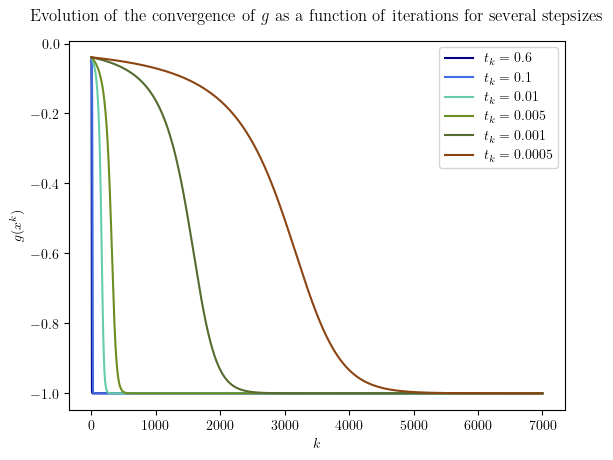

In [46]:
fig_tilde = plt.figure()
plt.plot(K_tilde[:,0], F_tilde[:,0], label='$t_k=0.6$', color='navy')
plt.plot(K_tilde[:,1], F_tilde[:,1], label='$t_k=0.1$', color='royalblue')
plt.plot(K_tilde[:,2], F_tilde[:,2], label='$t_k=0.01$', color='mediumaquamarine')
plt.plot(K_tilde[:,3], F_tilde[:,3], label='$t_k=0.005$', color='olivedrab')
plt.plot(K_tilde[:,4], F_tilde[:,4], label='$t_k=0.001$', color='darkolivegreen')
plt.plot(K_tilde[:,5], F_tilde[:,5], label='$t_k=0.0005$', color='saddlebrown')
plt.xlabel('$k$')
plt.ylabel('$g(x^k)$')
plt.ticklabel_format(style='scientific', axis='y', scilimits=(0,1))
plt.title('$\mathrm{Evolution\ of\ the\ convergence\ of\ } g \mathrm{\ as\ a\ function\ of\ iterations\ for\ several\ stepsizes}$',y=1.0, pad=14)
plt.legend()
plt.show

In [47]:
x_0_tilde = np.array([np.pi+1, np.pi-1])
k_tilde = 0 
n_iterations_tilde = 10000
stepsizes_tilde = np.array([20, 10, 5, 3])

K_tilde = np.ones((n_iterations_tilde,np.shape(stepsizes_tilde)[0]))
F_tilde = np.ones((n_iterations_tilde,np.shape(stepsizes_tilde)[0]))
N_tilde = np.ones((n_iterations_tilde,np.shape(stepsizes_tilde)[0]))
XX_tilde = np.ones((n_iterations_tilde,np.shape(stepsizes_tilde)[0]))
YY_tilde = np.ones((n_iterations_tilde,np.shape(stepsizes_tilde)[0]))

for s_tilde in stepsizes_tilde :
    x_tilde = x_0_tilde
    for k_tilde in range(n_iterations_tilde) :
        K_tilde[k_tilde,np.where(stepsizes_tilde == s_tilde)[0][0]] = k_tilde
        F_tilde[k_tilde,np.where(stepsizes_tilde == s_tilde)[0][0]] = -np.cos(x_tilde[0])*np.cos(x_tilde[1])*np.exp(-(x_tilde[0]-np.pi)**2 - (x_tilde[1]-np.pi)**2) 
        XX_tilde[k_tilde,np.where(stepsizes_tilde == s_tilde)[0][0]] = x_tilde[0]
        YY_tilde[k_tilde,np.where(stepsizes_tilde == s_tilde)[0][0]] = x_tilde[1]
        grad_k_tilde = np.array([np.cos(x_tilde[1])*np.exp(-(x_tilde[0]-np.pi)**2 - (x_tilde[1]-np.pi)**2)*(np.sin(x_tilde[0]) + 2*np.cos(x_tilde[0])*(x_tilde[0]-np.pi)), np.cos(x_tilde[0])*np.exp(-(x_tilde[0]-np.pi)**2 - (x_tilde[1]-np.pi)**2)*(np.sin(x_tilde[1]) + 2*np.cos(x_tilde[1])*(x_tilde[1]-np.pi))])
        N_tilde[k_tilde,np.where(stepsizes_tilde == s_tilde)[0][0]] = np.linalg.norm(grad_k_tilde)
        x_tilde = x_tilde - s_tilde*grad_k_tilde

<function matplotlib.pyplot.show(close=None, block=None)>

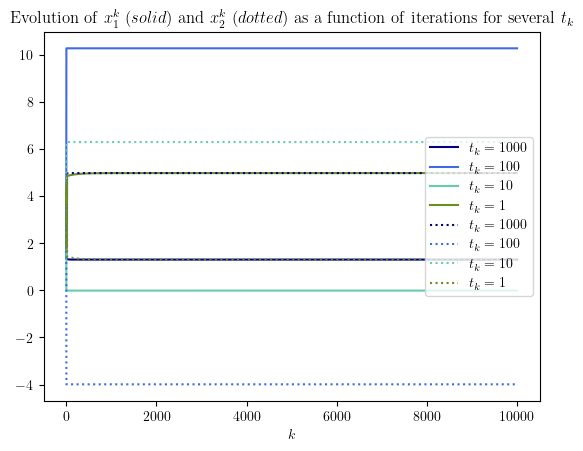

In [48]:
fig = plt.figure()
plt.plot(K_tilde[:,0], XX_tilde[:,0], label='$t_k=1000$', color='navy')
plt.plot(K_tilde[:,1], XX_tilde[:,1], label='$t_k=100$', color='royalblue')
plt.plot(K_tilde[:,2], XX_tilde[:,2], label='$t_k=10$', color='mediumaquamarine')
plt.plot(K_tilde[:,3], XX_tilde[:,3], label='$t_k=1$', color='olivedrab')
plt.plot(K_tilde[:,0], YY_tilde[:,0], label='$t_k=1000$', color='navy', linestyle='dotted')
plt.plot(K_tilde[:,1], YY_tilde[:,1], label='$t_k=100$', color='royalblue', linestyle='dotted')
plt.plot(K_tilde[:,2], YY_tilde[:,2], label='$t_k=10$', color='mediumaquamarine', linestyle='dotted')
plt.plot(K_tilde[:,3], YY_tilde[:,3], label='$t_k=1$', color='olivedrab', linestyle='dotted')
plt.xlabel('$k$')
plt.title('$\mathrm{Evolution\ of\ }x^k_1\ (solid) \mathrm{\ and\ } x^k_2\ (dotted) \mathrm{\ as\ a\ function\ of\ iterations\ for\ several\ }t_k$')
plt.legend(loc = 'right')
plt.show

In [49]:
x_0_tilde = np.array([np.pi+1, np.pi-1])
k_tilde = 0 
n_iterations_tilde = 10000
stepsizes_tilde = np.array([2.7, 2, 1, 0.65])

K_tilde = np.ones((n_iterations_tilde,np.shape(stepsizes_tilde)[0]))
F_tilde = np.ones((n_iterations_tilde,np.shape(stepsizes_tilde)[0]))
N_tilde = np.ones((n_iterations_tilde,np.shape(stepsizes_tilde)[0]))
XX_tilde = np.ones((n_iterations_tilde,np.shape(stepsizes_tilde)[0]))
YY_tilde = np.ones((n_iterations_tilde,np.shape(stepsizes_tilde)[0]))

for s_tilde in stepsizes_tilde :
    x_tilde = x_0_tilde
    for k_tilde in range(n_iterations_tilde) :
        K_tilde[k_tilde,np.where(stepsizes_tilde == s_tilde)[0][0]] = k_tilde
        F_tilde[k_tilde,np.where(stepsizes_tilde == s_tilde)[0][0]] = -np.cos(x_tilde[0])*np.cos(x_tilde[1])*np.exp(-(x_tilde[0]-np.pi)**2 - (x_tilde[1]-np.pi)**2) 
        XX_tilde[k_tilde,np.where(stepsizes_tilde == s_tilde)[0][0]] = x_tilde[0]
        YY_tilde[k_tilde,np.where(stepsizes_tilde == s_tilde)[0][0]] = x_tilde[1]
        grad_k_tilde = np.array([np.cos(x_tilde[1])*np.exp(-(x_tilde[0]-np.pi)**2 - (x_tilde[1]-np.pi)**2)*(np.sin(x_tilde[0]) + 2*np.cos(x_tilde[0])*(x_tilde[0]-np.pi)), np.cos(x_tilde[0])*np.exp(-(x_tilde[0]-np.pi)**2 - (x_tilde[1]-np.pi)**2)*(np.sin(x_tilde[1]) + 2*np.cos(x_tilde[1])*(x_tilde[1]-np.pi))])
        N_tilde[k_tilde,np.where(stepsizes_tilde == s_tilde)[0][0]] = np.linalg.norm(grad_k_tilde)
        x_tilde = x_tilde - s_tilde*grad_k_tilde

<function matplotlib.pyplot.show(close=None, block=None)>

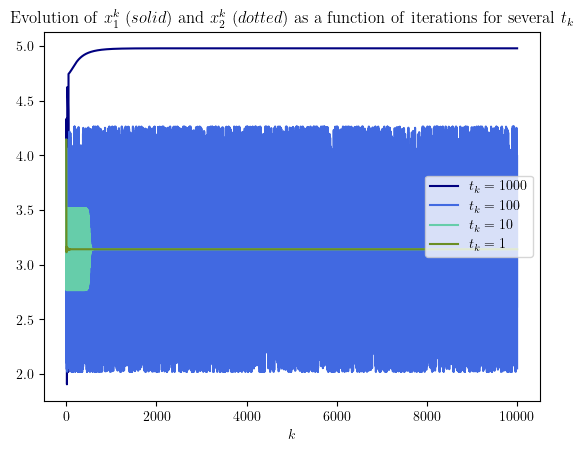

In [50]:
fig = plt.figure()
plt.plot(K_tilde[:,0], XX_tilde[:,0], label='$t_k=1000$', color='navy')
plt.plot(K_tilde[:,1], XX_tilde[:,1], label='$t_k=100$', color='royalblue')
plt.plot(K_tilde[:,2], XX_tilde[:,2], label='$t_k=10$', color='mediumaquamarine')
plt.plot(K_tilde[:,3], XX_tilde[:,3], label='$t_k=1$', color='olivedrab')
#plt.plot(K_tilde[:,0], YY_tilde[:,0], label='$t_k=1000$', color='navy', linestyle='dotted')
#plt.plot(K_tilde[:,1], YY_tilde[:,1], label='$t_k=100$', color='royalblue', linestyle='dotted')
#plt.plot(K_tilde[:,2], YY_tilde[:,2], label='$t_k=10$', color='mediumaquamarine', linestyle='dotted')
#plt.plot(K_tilde[:,3], YY_tilde[:,3], label='$t_k=1$', color='olivedrab', linestyle='dotted')
plt.xlabel('$k$')
plt.title('$\mathrm{Evolution\ of\ }x^k_1\ (solid) \mathrm{\ and\ } x^k_2\ (dotted) \mathrm{\ as\ a\ function\ of\ iterations\ for\ several\ }t_k$')
plt.legend(loc = 'right')
plt.show

In [51]:
-np.cos(np.pi+1)*np.cos(np.pi-1)*np.exp(-(np.pi+1-np.pi)**2 - (np.pi-1-np.pi)**2) 

-0.03950796662224241

## 2.2 Nonconstant stepsize

### 2.2.1 Starting point $x^0$

In [52]:
# (S.0)
delta = 0.01
sigma = 0.5
beta_1 = 0.25
beta_2 = 0.75
# (S.1)
tau = sigma
j = 0

t_A = 0
n_iterations = 50000
x = np.array([0, 0])
K = np.ones(n_iterations) # iterations k
XX = np.ones(n_iterations) # values of x^k_1
YY = np.ones(n_iterations) # values of x^k_2
F = np.ones(n_iterations) # values of f(x^k)
N = np.ones(n_iterations) # values of ||gradient f(x^k)||

for k in range(n_iterations) :
    K[k] = k
    XX[k] = x[0]
    YY[k] = x[1]
    F[k] = -np.cos(x[0])*np.cos(x[1])*np.exp(-(x[0]-np.pi)**2 - (x[1]-np.pi)**2)
    grad_k = np.array([np.cos(x[1])*np.exp(-(x[0]-np.pi)**2 - (x[1]-np.pi)**2)*(np.sin(x[0]) + 2*np.cos(x[0])*(x[0]-np.pi)), np.cos(x[0])*np.exp(-(x[0]-np.pi)**2 - (x[1]-np.pi)**2)*(np.sin(x[1]) + 2*np.cos(x[1])*(x[1]-np.pi))])
    N[k] = np.linalg.norm(grad_k)
    while -np.cos(x[0]-tau*np.cos(x[1])*np.exp(-(x[0]-np.pi)**2 - (x[1]-np.pi)**2)*(np.sin(x[0]) + 2*np.cos(x[0])*(x[0]-np.pi)))*np.cos(x[1]-tau*np.cos(x[0])*np.exp(-(x[0]-np.pi)**2 - (x[1]-np.pi)**2)*(np.sin(x[1]) + 2*np.cos(x[1])*(x[1]-np.pi)))*np.exp(-(x[0]-tau*np.cos(x[1])*np.exp(-(x[0]-np.pi)**2 - (x[1]-np.pi)**2)*(np.sin(x[0]) + 2*np.cos(x[0])*(x[0]-np.pi))-np.pi)**2-(x[1]-tau*np.cos(x[0])*np.exp(-(x[0]-np.pi)**2 - (x[1]-np.pi)**2)*(np.sin(x[1]) + 2*np.cos(x[1])*(x[1]-np.pi))-np.pi)**2) > -np.cos(x[0])*np.cos(x[1])*np.exp(-(x[0]-np.pi)**2-(x[1]-np.pi)**2)-delta*tau*np.square(N[k]):
        tau = (beta_2*tau-beta_1*tau)*np.random.random_sample()+beta_1*tau
        j = j+1        
    t_A = tau
    x = x - t_A*grad_k # steepest descent algorithm

<function matplotlib.pyplot.show(close=None, block=None)>

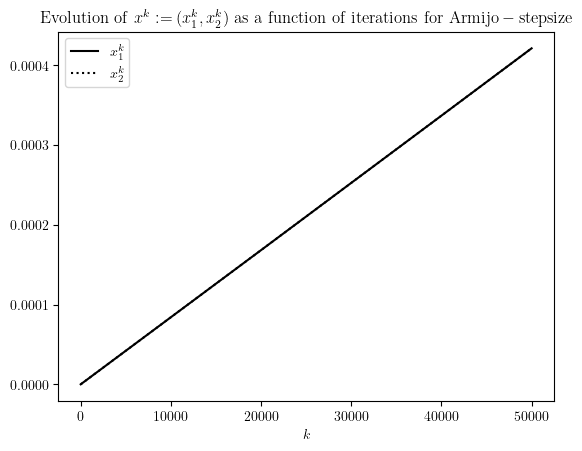

In [53]:
fig = plt.figure()
plt.plot(K, XX, label='$x^k_1$', color='black')
plt.plot(K, YY, label='$x^k_2$', linestyle='dotted', color='black')
plt.xlabel('$k$')
plt.title('$\mathrm{Evolution\ of\ }x^k:=(x^k_1,x^k_2) \mathrm{\ as\ a\ function\ of\ iterations\ for\ Armijo-stepsize}$')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

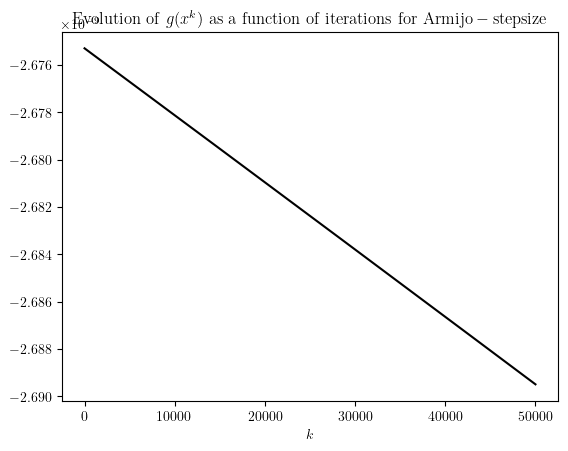

In [54]:
fig = plt.figure()
plt.plot(K, F, color='black')
plt.xlabel('$k$')
plt.title('$\mathrm{Evolution\ of\ }g(x^k) \mathrm{\ as\ a\ function\ of\ iterations\ for\ Armijo-stepsize}$')
#plt.legend()
plt.show

### 2.2.2 Starting point $\tilde{x}^0$

In [55]:
# (S.0)
delta = 0.01
sigma = 0.5
beta_1 = 0.25
beta_2 = 0.75
# (S.1)
tau = sigma
j = 0

t_A = 0
n_iterations = 15
x = np.array([np.pi+1, np.pi-1])
K = np.ones(n_iterations) # iterations k
XX = np.ones(n_iterations) # values of x^k_1
YY = np.ones(n_iterations) # values of x^k_2
F = np.ones(n_iterations) # values of f(x^k)
N = np.ones(n_iterations) # values of ||gradient f(x^k)||

for k in range(n_iterations) :
    K[k] = k
    XX[k] = x[0]
    YY[k] = x[1]
    F[k] = -np.cos(x[0])*np.cos(x[1])*np.exp(-(x[0]-np.pi)**2 - (x[1]-np.pi)**2)
    grad_k = np.array([np.cos(x[1])*np.exp(-(x[0]-np.pi)**2 - (x[1]-np.pi)**2)*(np.sin(x[0]) + 2*np.cos(x[0])*(x[0]-np.pi)), np.cos(x[0])*np.exp(-(x[0]-np.pi)**2 - (x[1]-np.pi)**2)*(np.sin(x[1]) + 2*np.cos(x[1])*(x[1]-np.pi))])
    N[k] = np.linalg.norm(grad_k)
    while -np.cos(x[0]-tau*np.cos(x[1])*np.exp(-(x[0]-np.pi)**2 - (x[1]-np.pi)**2)*(np.sin(x[0]) + 2*np.cos(x[0])*(x[0]-np.pi)))*np.cos(x[1]-tau*np.cos(x[0])*np.exp(-(x[0]-np.pi)**2 - (x[1]-np.pi)**2)*(np.sin(x[1]) + 2*np.cos(x[1])*(x[1]-np.pi)))*np.exp(-(x[0]-tau*np.cos(x[1])*np.exp(-(x[0]-np.pi)**2 - (x[1]-np.pi)**2)*(np.sin(x[0]) + 2*np.cos(x[0])*(x[0]-np.pi))-np.pi)**2-(x[1]-tau*np.cos(x[0])*np.exp(-(x[0]-np.pi)**2 - (x[1]-np.pi)**2)*(np.sin(x[1]) + 2*np.cos(x[1])*(x[1]-np.pi))-np.pi)**2) > -np.cos(x[0])*np.cos(x[1])*np.exp(-(x[0]-np.pi)**2-(x[1]-np.pi)**2)-delta*tau*np.square(N[k]):
        tau = (beta_2*tau-beta_1*tau)*np.random.random_sample()+beta_1*tau
        j = j+1        
    t_A = tau
    x = x - t_A*grad_k # steepest descent algorithm

<function matplotlib.pyplot.show(close=None, block=None)>

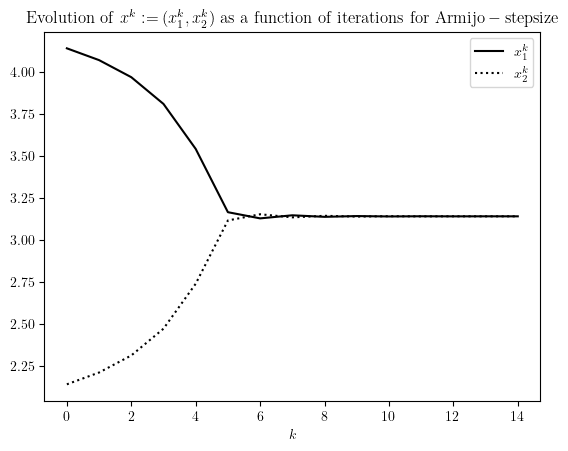

In [56]:
fig = plt.figure()
plt.plot(K, XX, label='$x^k_1$', color='black')
plt.plot(K, YY, label='$x^k_2$', linestyle='dotted', color='black')
plt.xlabel('$k$')
plt.title('$\mathrm{Evolution\ of\ }x^k:=(x^k_1,x^k_2) \mathrm{\ as\ a\ function\ of\ iterations\ for\ Armijo-stepsize}$')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

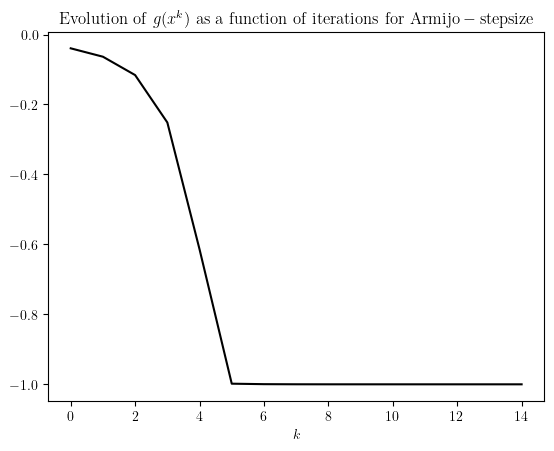

In [57]:
fig = plt.figure()
plt.plot(K, F, color='black')
plt.xlabel('$k$')
plt.title('$\mathrm{Evolution\ of\ }g(x^k) \mathrm{\ as\ a\ function\ of\ iterations\ for\ Armijo-stepsize}$')
#plt.legend()
plt.show

In [58]:
XX[14]

3.1415450126164974

In [59]:
YY[14]

3.141640294563089

In [60]:
F[14]

-0.9999999931910131

# Conclusion

$\forall (x_1,x_2)\in\mathbb{R}^2\quad \mathcal{H}f(x_1,x_2)=\begin{pmatrix} 1200x_1^2-400x_2+2 & -400x_1 \\ -400x_1 & 200\end{pmatrix}$

## Starting point $x^0$

In [61]:
x = np.array([0,0])
n_iterations = 10
K = np.ones(n_iterations) # iterations k
XX = np.ones(n_iterations) # values of x^k_1
YY = np.ones(n_iterations) # values of x^k_2
F = np.ones(n_iterations) # values of f(x^k)
N = np.ones(n_iterations) # values of ||gradient f(x^k)||

for k in range(n_iterations) :
        K[k] = k
        F[k] = np.square(1-x[0]) + 100*np.square(x[1]-x[0]**2)
        XX[k] = x[0]
        YY[k] = x[1]
        hessien_k = np.array([[1200*x[0]**2 - 400*x[1]+2, -400*x[0]],[-400*x[0], 200]])
        grad_k = np.array([400*x[0]*(x[0]**2-x[1])+2*(x[0]-1), 200*(x[1]-x[0]**2)])        
        x = x - np.matmul(np.linalg.inv(hessien_k),grad_k)

<function matplotlib.pyplot.show(close=None, block=None)>

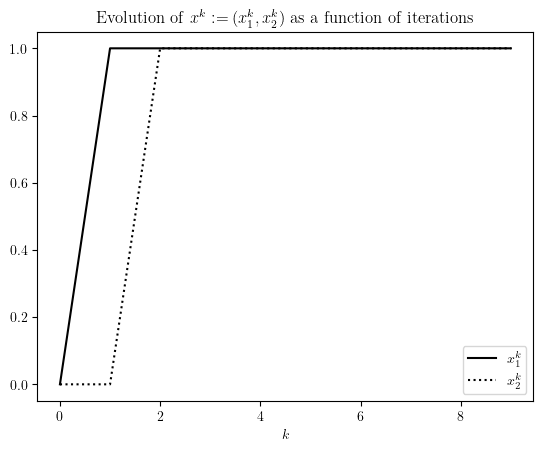

In [62]:
fig = plt.figure()
plt.plot(K, XX, label='$x^k_1$', color='black')
plt.plot(K, YY, label='$x^k_2$', linestyle='dotted', color='black')
plt.xlabel('$k$')
plt.title('$\mathrm{Evolution\ of\ }x^k:=(x^k_1,x^k_2) \mathrm{\ as\ a\ function\ of\ iterations}$')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

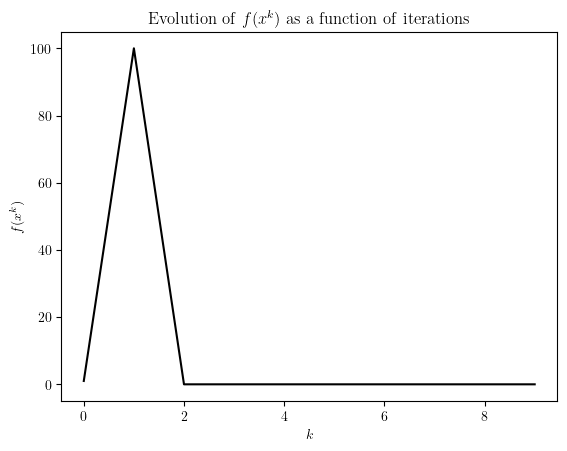

In [63]:
fig = plt.figure()
plt.plot(K, F, color='black')
plt.xlabel('$k$')
plt.ylabel('$f(x^k)$')
plt.title('$\mathrm{Evolution\ of\ }f(x^k) \mathrm{\ as\ a\ function\ of\ iterations}$')
#plt.legend()
plt.show

## Starting point $\tilde{x}^0$

In [64]:
x = np.array([np.pi+1,np.pi-1])
n_iterations = 10
K = np.ones(n_iterations) # iterations k
XX = np.ones(n_iterations) # values of x^k_1
YY = np.ones(n_iterations) # values of x^k_2
F = np.ones(n_iterations) # values of f(x^k)
N = np.ones(n_iterations) # values of ||gradient f(x^k)||

for k in range(n_iterations) :
        K[k] = k
        F[k] = np.square(1-x[0]) + 100*np.square(x[1]-x[0]**2)
        XX[k] = x[0]
        YY[k] = x[1]
        hessien_k = np.array([[1200*x[0]**2 - 400*x[1]+2, -400*x[0]],[-400*x[0], 200]])
        grad_k = np.array([400*x[0]*(x[0]**2-x[1])+2*(x[0]-1), 200*(x[1]-x[0]**2)])        
        x = x - np.matmul(np.linalg.inv(hessien_k),grad_k)

<function matplotlib.pyplot.show(close=None, block=None)>

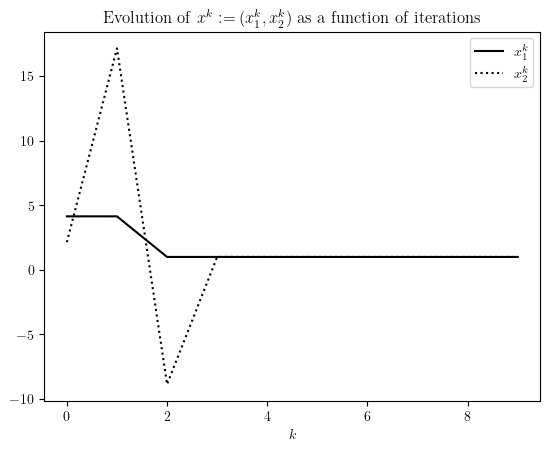

In [65]:
fig = plt.figure()
plt.plot(K, XX, label='$x^k_1$', color='black')
plt.plot(K, YY, label='$x^k_2$', linestyle='dotted', color='black')
plt.xlabel('$k$')
plt.title('$\mathrm{Evolution\ of\ }x^k:=(x^k_1,x^k_2) \mathrm{\ as\ a\ function\ of\ iterations}$')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

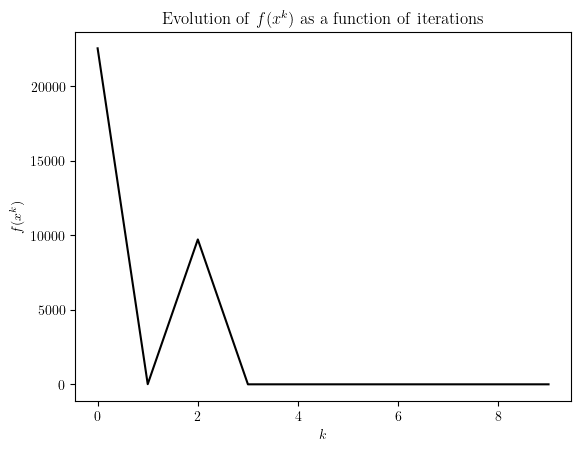

In [66]:
fig = plt.figure()
plt.plot(K, F, color='black')
plt.xlabel('$k$')
plt.ylabel('$f(x^k)$')
plt.title('$\mathrm{Evolution\ of\ }f(x^k) \mathrm{\ as\ a\ function\ of\ iterations}$')
#plt.legend()
plt.show

In [72]:
XX[4]

1.0000000000000167

In [69]:
YY[8]

1.0

In [70]:
F[8]

0.0